### Use decision trees to prepare a model on fraud data 

### treating those who have taxable_income <= 30000 as "Risky" and others are "Good"

Data Description :

Undergrad : person is under graduated or not


Marital.Status : marital status of a person

Taxable.Income : Taxable income is the amount of how much tax an individual owes to the government 

Work Experience : Work experience of an individual person

Urban : Whether that person belongs to urban area or not


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder#for encoding
from sklearn.model_selection import train_test_split#for train test splitting
from sklearn.tree import DecisionTreeClassifier#for decision tree object
from sklearn.metrics import classification_report, confusion_matrix#for checking testing results
from sklearn.tree import plot_tree
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [2]:
fraud= pd.read_csv('Fraud_check.csv')

In [3]:
fraud.shape

(600, 6)

In [4]:
fraud.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [6]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
fraud.isnull().any()

Undergrad          False
Marital.Status     False
Taxable.Income     False
City.Population    False
Work.Experience    False
Urban              False
dtype: bool

In [8]:
fraud.duplicated().any()

False

In [9]:
#Creating dummy vairables dropping first dummy variable
fraud =pd.get_dummies(fraud,columns=['Urban'] ,drop_first=True)

In [10]:
#Creating dummy vairables dropping first dummy variable
fraud =pd.get_dummies(fraud,columns=['Undergrad'] ,drop_first=True)

In [11]:
le = LabelEncoder()
le.fit_transform(fraud['Marital.Status'])

array([2, 0, 1, 2, 1, 0, 0, 2, 2, 0, 2, 2, 0, 1, 1, 0, 0, 1, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 2, 0,
       0, 1, 1, 2, 1, 0, 2, 2, 2, 2, 0, 2, 1, 2, 2, 2, 1, 1, 0, 0, 2, 0,
       1, 1, 2, 2, 0, 2, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 2,
       1, 1, 0, 1, 0, 1, 2, 2, 2, 0, 1, 1, 2, 1, 0, 0, 2, 2, 2, 1, 1, 1,
       2, 2, 2, 1, 2, 0, 1, 2, 0, 0, 2, 1, 1, 1, 0, 0, 0, 2, 1, 2, 2, 2,
       0, 2, 1, 0, 0, 2, 2, 0, 1, 1, 2, 2, 2, 0, 0, 0, 1, 2, 1, 2, 2, 0,
       2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 0, 2, 0, 1, 1, 2, 2, 2,
       1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 1, 2, 0, 1, 2, 2, 1, 1, 2, 2, 1, 2,
       2, 1, 2, 0, 2, 0, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0,
       0, 2, 0, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 0, 2, 2,
       0, 0, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 0, 1, 1, 1, 0, 1, 2, 2, 0, 1,
       2, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 0, 1, 2, 0, 2, 1, 0, 0, 2,
       0, 2, 1, 2, 1, 2, 2, 0, 2, 1, 0, 1, 2, 2, 1,

In [12]:
fraud['Maritial'] = le.fit_transform(fraud['Marital.Status'])
fraud.head()

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Maritial
0,Single,68833,50047,10,1,0,2
1,Divorced,33700,134075,18,1,1,0
2,Married,36925,160205,30,1,0,1
3,Single,50190,193264,15,1,1,2
4,Married,81002,27533,28,0,0,1


In [13]:
#Creating new cols TaxInc and dividing 'Taxable.Income' cols on the basis of [10002,30000,99620] for Risky and Good
# Bin= min,cutoff,max
fraud["TaxInc"] = pd.cut(fraud["Taxable.Income"], bins = [10002,30000,99620], labels = ["Risky", "Good"])

In [14]:
#After creation of new col. TaxInc also made its dummies var concating right side of df
fraud = pd.get_dummies(fraud,columns = ["TaxInc"],drop_first=True)

In [15]:
fraud

,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Maritial,TaxInc_Good
0,Single,68833,50047,10,1,0,2,1
1,Divorced,33700,134075,18,1,1,0,1
2,Married,36925,160205,30,1,0,1,1
3,Single,50190,193264,15,1,1,2,1
4,Married,81002,27533,28,0,0,1,1
...,...,...,...,...,...,...,...,...
595,Divorced,76340,39492,7,1,1,0,1
596,Divorced,69967,55369,2,1,1,0,1
597,Divorced,47334,154058,0,1,0,0,1
598,Married,98592,180083,17,0,1,1,1


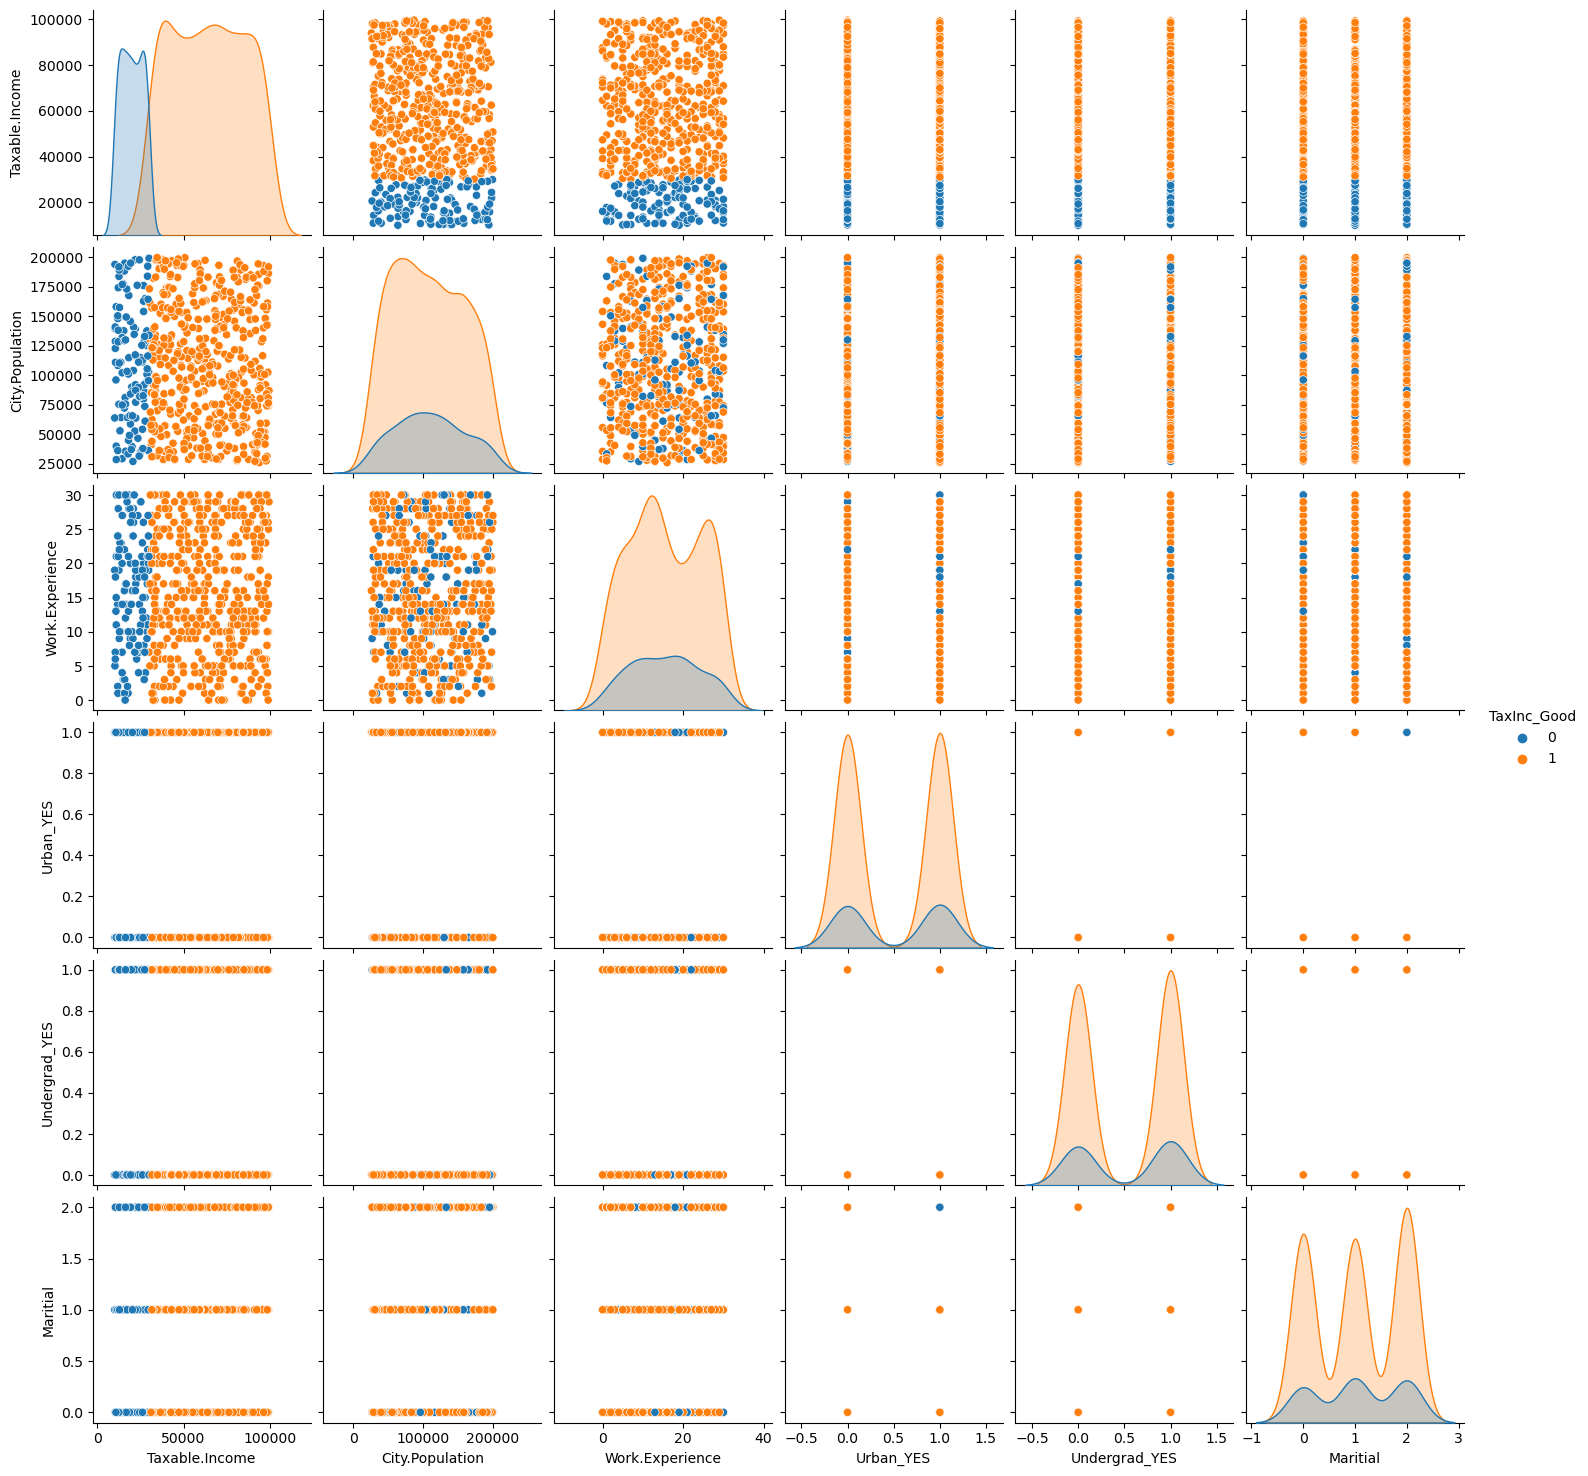

In [16]:
sns.pairplot(data=fraud, hue = 'TaxInc_Good')

### PreProcessing 

In [17]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)


In [18]:
# Normalized data frame (considering the numerical part of data)
fraud1 = norm_func(fraud.iloc[:,1:])
fraud1.head(10)

,Taxable.Income,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Maritial,TaxInc_Good
0,0.656468,0.139472,0.333333,1.0,0.0,1.0,1.0
1,0.264428,0.622394,0.600000,1.0,1.0,0.0,1.0
2,0.300415,0.772568,1.000000,1.0,0.0,0.5,1.0
3,0.448436,0.962563,0.500000,1.0,1.0,1.0,1.0
4,0.792258,0.010081,0.933333,0.0,0.0,0.5,1.0
5,0.260288,0.520710,0.000000,0.0,0.0,0.0,1.0
6,0.818537,0.316732,0.266667,1.0,0.0,0.0,1.0
7,0.588857,0.606176,0.100000,1.0,1.0,1.0,1.0
8,0.820345,0.440819,0.400000,1.0,0.0,1.0,1.0
9,0.983630,0.745424,0.133333,1.0,1.0,0.0,1.0


In [19]:
##Converting the Taxable income variable to bucketing. 
fraud1["income"]="<=30000"
fraud1.loc[fraud["Taxable.Income"]>=30000,"income"]="Good"
fraud1.loc[fraud["Taxable.Income"]<=30000,"income"]="Risky"

In [20]:
fraud1.drop(["Taxable.Income"],axis=1,inplace=True)
fraud1.head()

,City.Population,Work.Experience,Urban_YES,Undergrad_YES,Maritial,TaxInc_Good,income
0,0.139472,0.333333,1.0,0.0,1.0,1.0,Good
1,0.622394,0.600000,1.0,1.0,0.0,1.0,Good
2,0.772568,1.000000,1.0,0.0,0.5,1.0,Good
3,0.962563,0.500000,1.0,1.0,1.0,1.0,Good
4,0.010081,0.933333,0.0,0.0,0.5,1.0,Good


In [21]:
fraud1.rename(columns={"City.Population":"population","Work.Experience":'Experience'},inplace=True)

In [22]:
fraud1.head()

,population,Experience,Urban_YES,Undergrad_YES,Maritial,TaxInc_Good,income
0,0.139472,0.333333,1.0,0.0,1.0,1.0,Good
1,0.622394,0.600000,1.0,1.0,0.0,1.0,Good
2,0.772568,1.000000,1.0,0.0,0.5,1.0,Good
3,0.962563,0.500000,1.0,1.0,1.0,1.0,Good
4,0.010081,0.933333,0.0,0.0,0.5,1.0,Good


In [23]:
## Split into X and Y
X = fraud1.iloc[:,:5]
y = fraud1['income']

In [24]:
X.head()

,population,Experience,Urban_YES,Undergrad_YES,Maritial
0,0.139472,0.333333,1.0,0.0,1.0
1,0.622394,0.600000,1.0,1.0,0.0
2,0.772568,1.000000,1.0,0.0,0.5
3,0.962563,0.500000,1.0,1.0,1.0
4,0.010081,0.933333,0.0,0.0,0.5


In [25]:
y.head(15)

0      Good
1      Good
2      Good
3      Good
4      Good
5      Good
6      Good
7      Good
8      Good
9      Good
10    Risky
11     Good
12    Risky
13     Good
14     Good
Name: income, dtype: object

In [26]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((480, 5), (480,), (120, 5), (120,))

In [28]:
from sklearn.model_selection import GridSearchCV, KFold
# Create the model
model = DecisionTreeClassifier()

# Define the grid search parameters
tuned_paramerters= [{'criterion':['gini','entropy'],
                     'max_depth': range(2,10)}]


param_grid = tuned_paramerters

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)

In [29]:
grid_result= grid.fit(x_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5; 1/16] START criterion=gini, max_depth=2................................
[CV 1/5; 1/16] END .criterion=gini, max_depth=2;, score=0.781 total time=   0.0s
[CV 2/5; 1/16] START criterion=gini, max_depth=2................................
[CV 2/5; 1/16] END .criterion=gini, max_depth=2;, score=0.750 total time=   0.0s
[CV 3/5; 1/16] START criterion=gini, max_depth=2................................
[CV 3/5; 1/16] END .criterion=gini, max_depth=2;, score=0.833 total time=   0.0s
[CV 4/5; 1/16] START criterion=gini, max_depth=2................................
[CV 4/5; 1/16] END .criterion=gini, max_depth=2;, score=0.802 total time=   0.0s
[CV 5/5; 1/16] START criterion=gini, max_depth=2................................
[CV 5/5; 1/16] END .criterion=gini, max_depth=2;, score=0.802 total time=   0.0s
[CV 1/5; 2/16] START criterion=gini, max_depth=3................................
[CV 1/5; 2/16] END .criterion=gini, max_depth=3;

[CV 5/5; 15/16] END criterion=entropy, max_depth=8;, score=0.771 total time=   0.0s
[CV 1/5; 16/16] START criterion=entropy, max_depth=9............................
[CV 1/5; 16/16] END criterion=entropy, max_depth=9;, score=0.750 total time=   0.0s
[CV 2/5; 16/16] START criterion=entropy, max_depth=9............................
[CV 2/5; 16/16] END criterion=entropy, max_depth=9;, score=0.740 total time=   0.0s
[CV 3/5; 16/16] START criterion=entropy, max_depth=9............................
[CV 3/5; 16/16] END criterion=entropy, max_depth=9;, score=0.740 total time=   0.0s
[CV 4/5; 16/16] START criterion=entropy, max_depth=9............................
[CV 4/5; 16/16] END criterion=entropy, max_depth=9;, score=0.792 total time=   0.0s
[CV 5/5; 16/16] START criterion=entropy, max_depth=9............................
[CV 5/5; 16/16] END criterion=entropy, max_depth=9;, score=0.771 total time=   0.0s


In [30]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7979166666666667, using {'criterion': 'entropy', 'max_depth': 2}
0.7937500000000001,0.027481054079735265 with: {'criterion': 'gini', 'max_depth': 2}
0.7833333333333334,0.04135298591933168 with: {'criterion': 'gini', 'max_depth': 3}
0.78125,0.023753654689565386 with: {'criterion': 'gini', 'max_depth': 4}
0.775,0.025173012444988704 with: {'criterion': 'gini', 'max_depth': 5}
0.76875,0.03047653924651624 with: {'criterion': 'gini', 'max_depth': 6}
0.7604166666666667,0.03159531435021477 with: {'criterion': 'gini', 'max_depth': 7}
0.74375,0.03584302194601096 with: {'criterion': 'gini', 'max_depth': 8}
0.7354166666666666,0.03461093276215863 with: {'criterion': 'gini', 'max_depth': 9}
0.7979166666666667,0.02338535866733716 with: {'criterion': 'entropy', 'max_depth': 2}
0.7979166666666667,0.02338535866733716 with: {'criterion': 'entropy', 'max_depth': 3}
0.7958333333333334,0.026841872347344024 with: {'criterion': 'entropy', 'max_depth': 4}
0.7729166666666666,0.036324157862838935 with: 

#### 0.7833333333333334,0.04135298591933168 with: {'criterion': 'gini', 'max_depth': 3} would be best for gini
although max_depth:2 has better score but poor parmas
#### 0.7979166666666667,0.02338535866733716 with: {'criterion': 'entropy', 'max_depth': 2} would be best for entropy

## Decision Tree using Gini

In [31]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [32]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

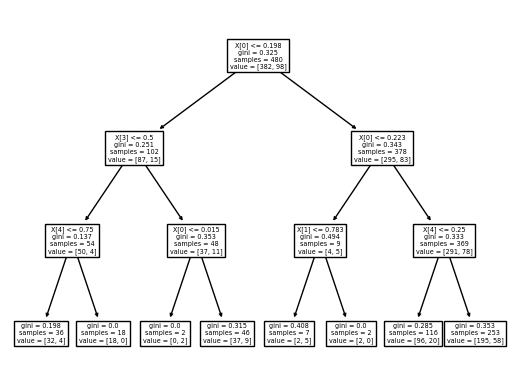

In [33]:
tree.plot_tree(model_gini);

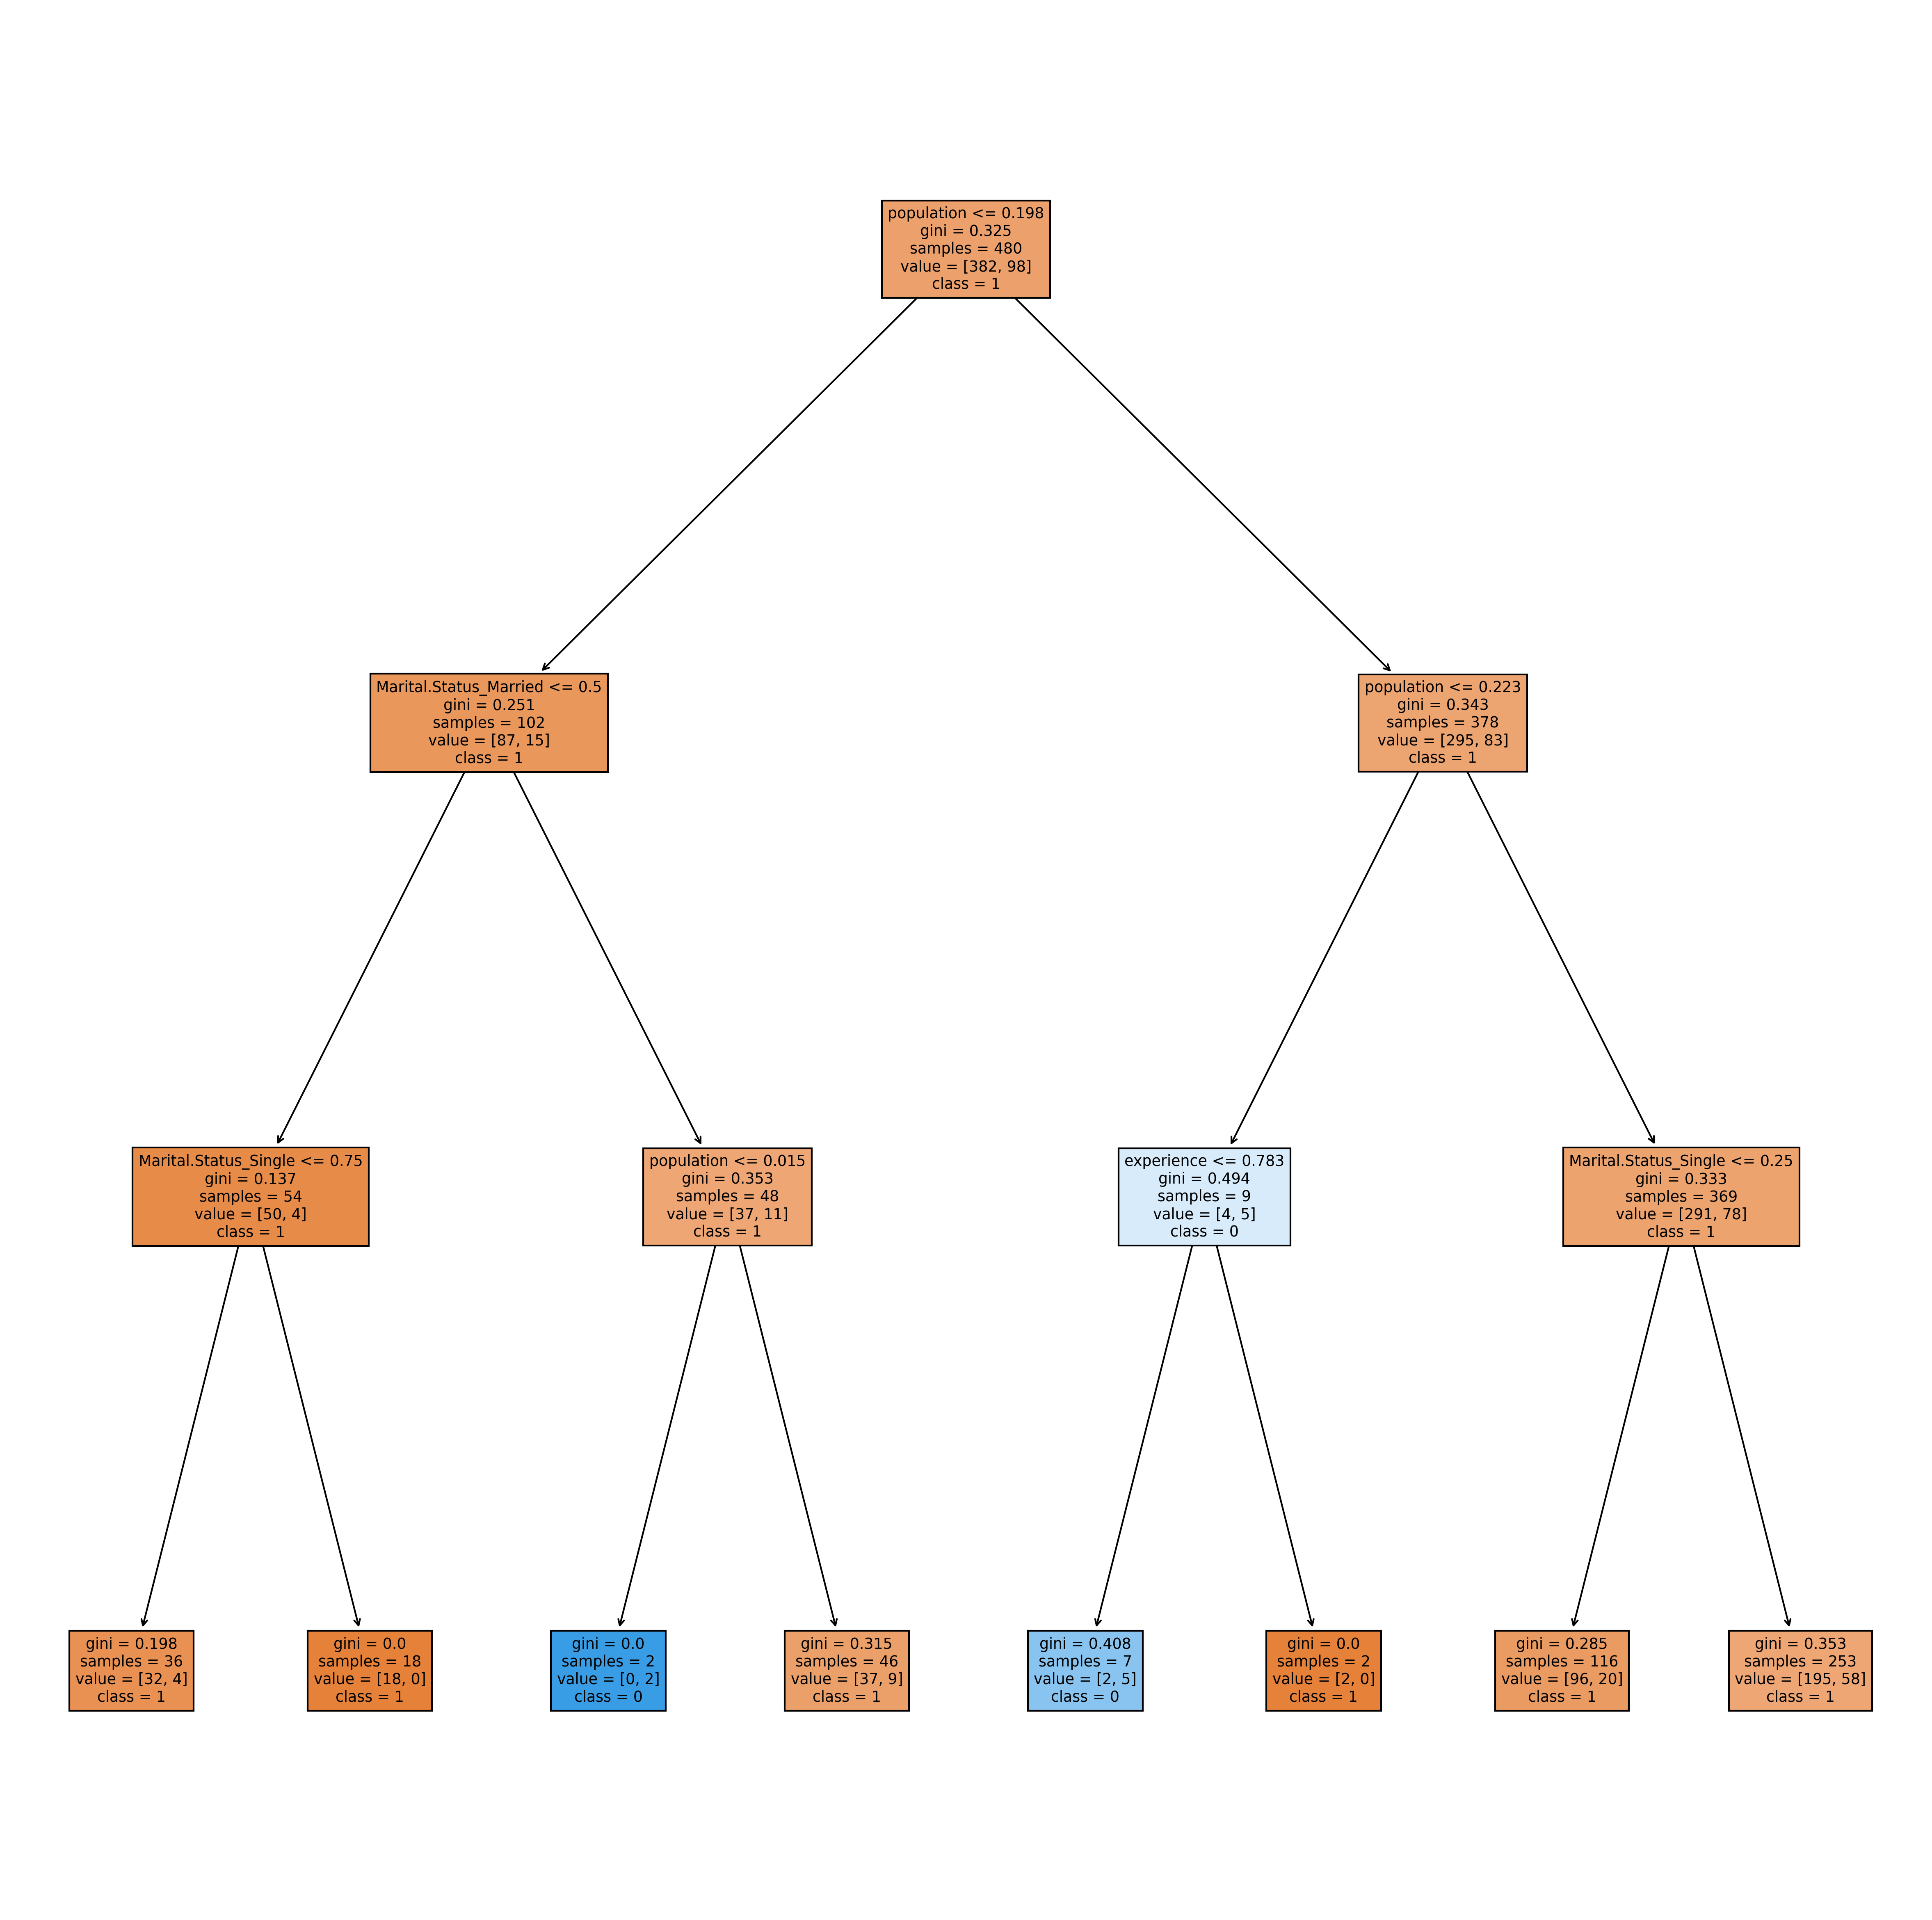

In [34]:
fn=['population','experience','Undergrad_YES','Marital.Status_Married','Marital.Status_Single','Urban_YES']
cn=['1', '0']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [35]:
train_predicted = model_gini.predict(x_train)

In [36]:
train_predicted

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
     

In [37]:
confusion_matrix(y_train, train_predicted)

array([[380,   2],
       [ 91,   7]], dtype=int64)

In [38]:
test_predicted = model_gini.predict(x_test)

In [39]:
confusion_matrix(y_test, test_predicted)

array([[91,  3],
       [26,  0]], dtype=int64)

In [40]:
pred=model_gini.predict(x_test)
np.mean(pred==y_test)

0.7583333333333333

In [41]:
## For better understanding than confusion matrix
pd.crosstab(y_train, train_predicted)

col_0,Good,Risky
income,,
Good,380,2
Risky,91,7


In [42]:
## For better understanding than confusion matrix
pd.crosstab(y_test,test_predicted)

col_0,Good,Risky
income,,
Good,91,3
Risky,26,0


## Decision Tree using Entropy

In [43]:
model_entro = DecisionTreeClassifier(criterion = 'entropy',max_depth=2)
model_entro.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

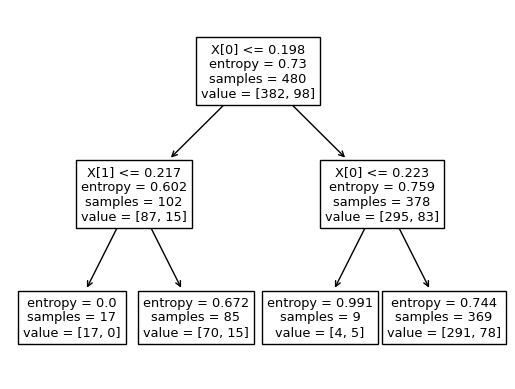

In [44]:
tree.plot_tree(model_entro);

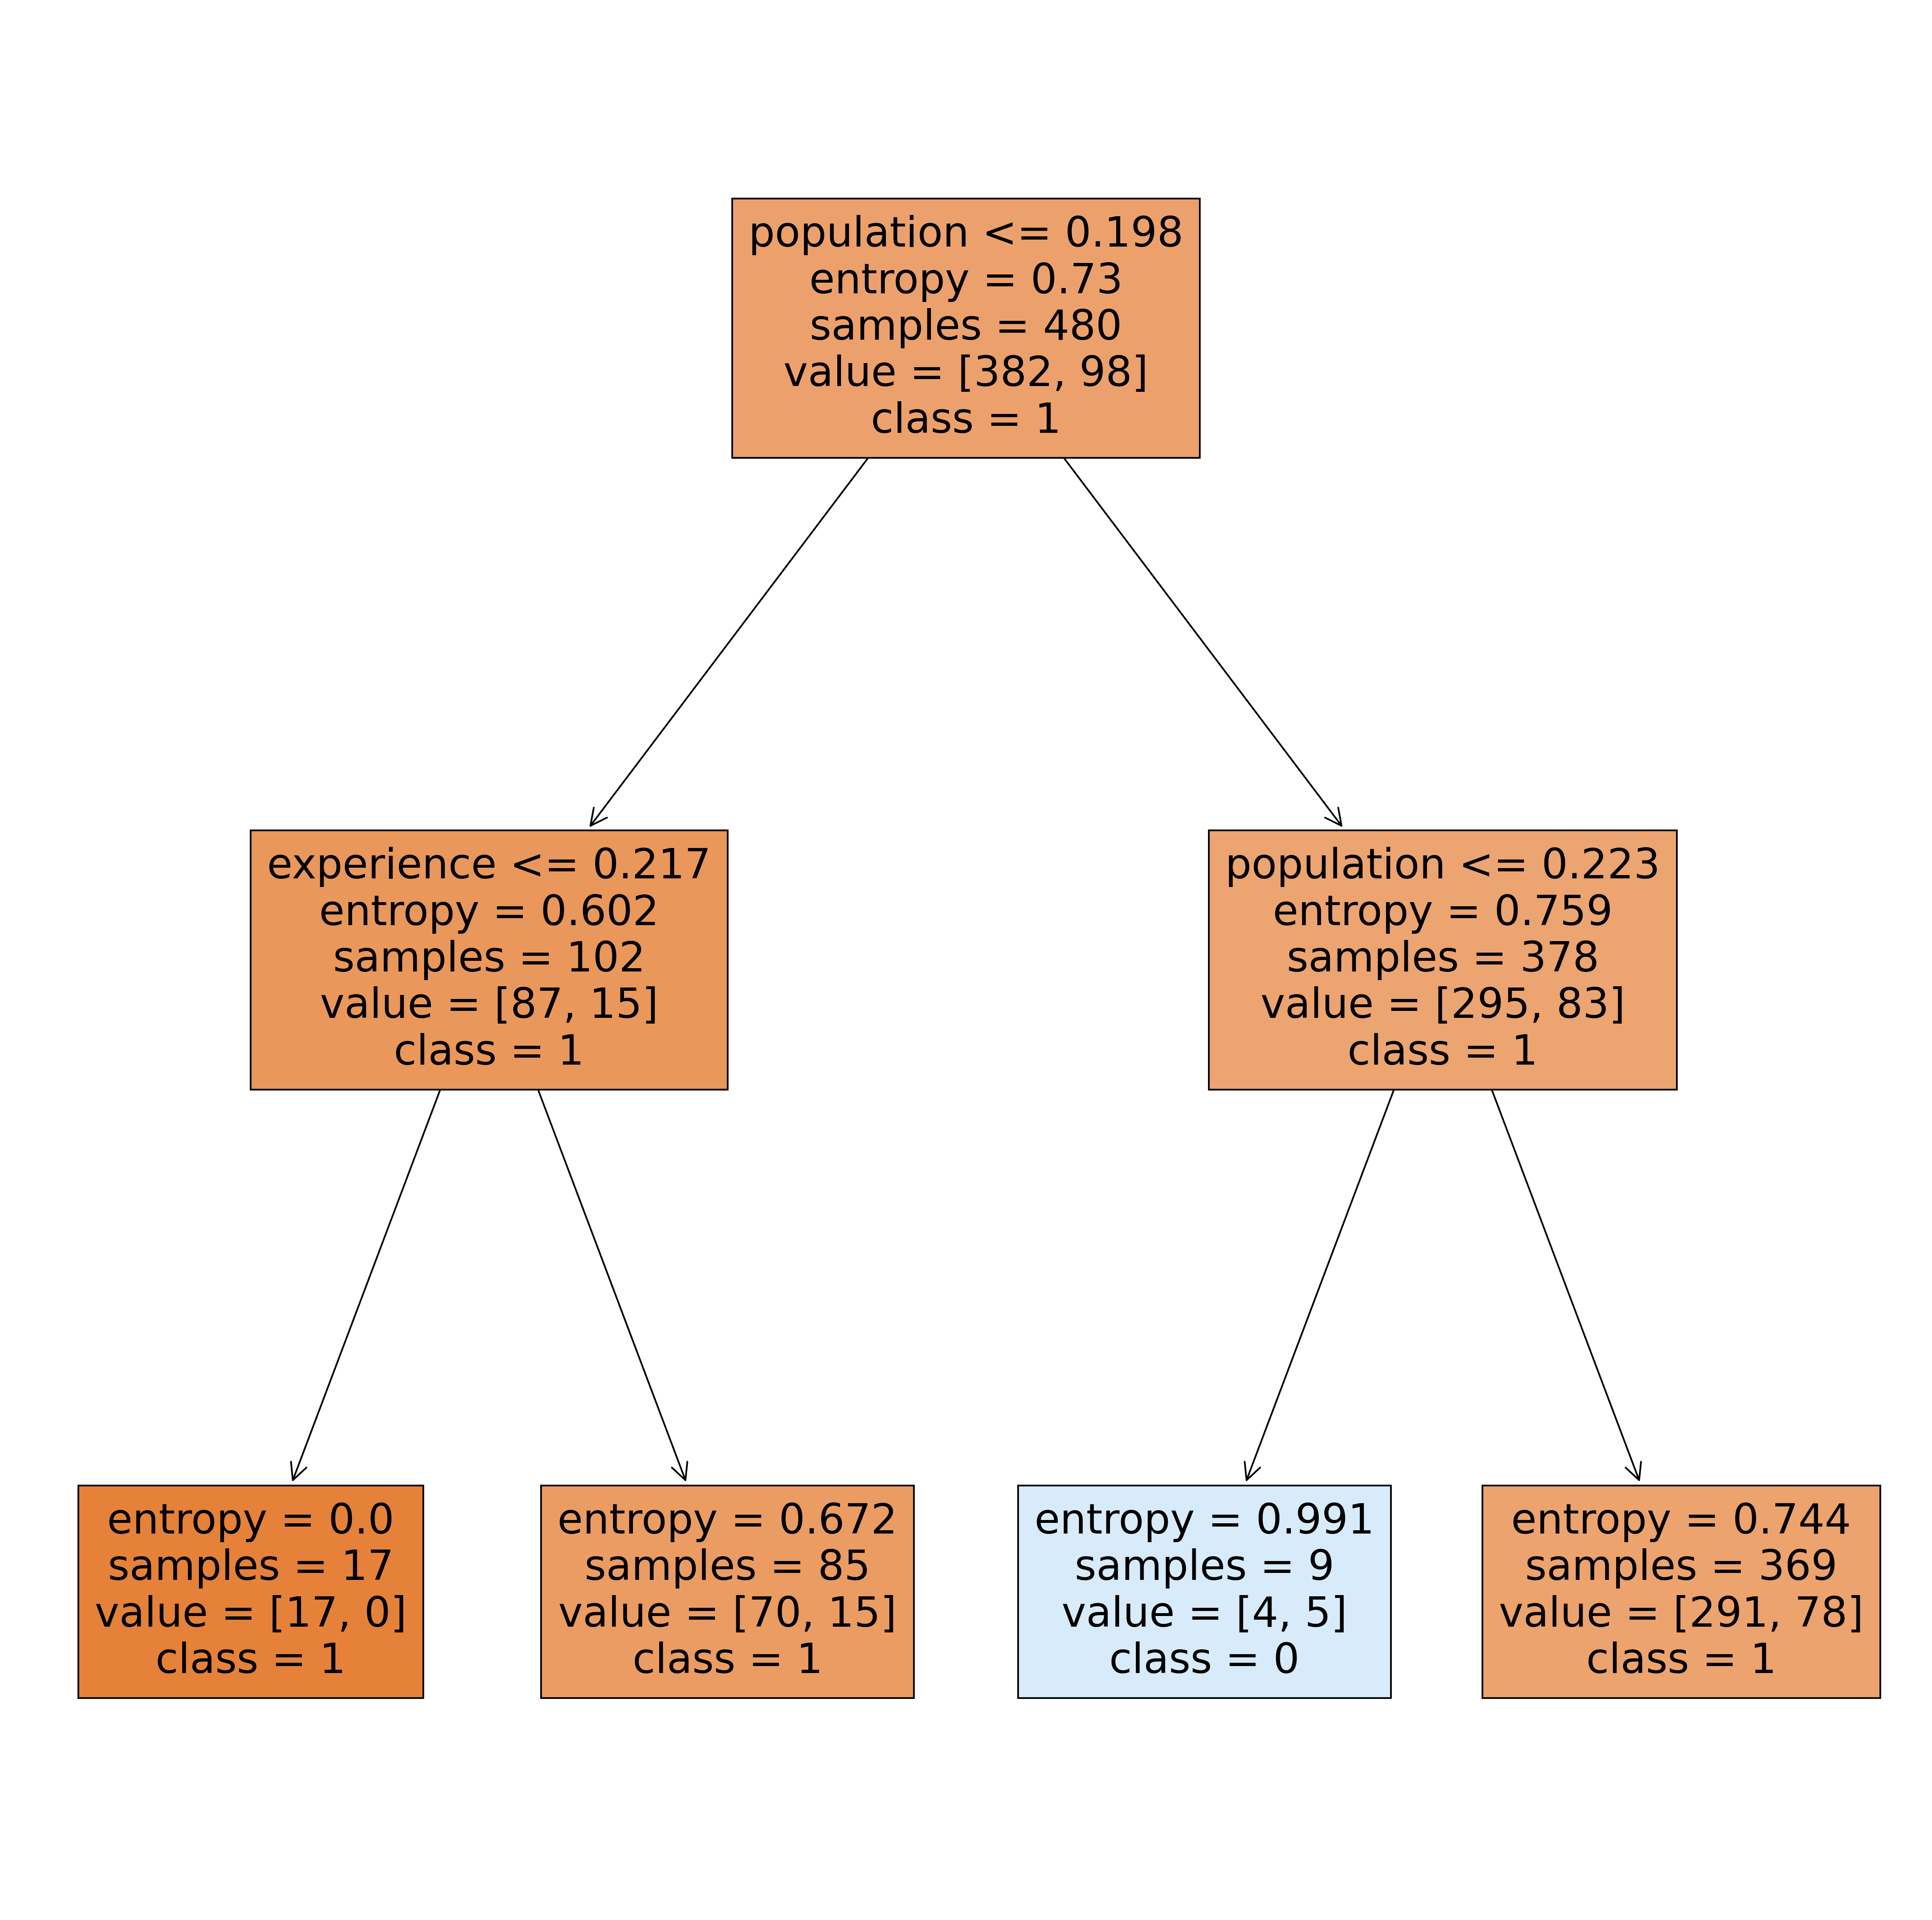

In [45]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,20), dpi=300)
tree.plot_tree(model_entro,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [46]:
train_predicted1 = model_entro.predict(x_train)

In [47]:
confusion_matrix(y_train, train_predicted1)

array([[378,   4],
       [ 93,   5]], dtype=int64)

In [48]:
test_predicted1 = model_entro.predict(x_test)

In [49]:
confusion_matrix(y_test, test_predicted1)

array([[92,  2],
       [26,  0]], dtype=int64)

In [50]:
print(classification_report(y_train, train_predicted1))

              precision    recall  f1-score   support

        Good       0.80      0.99      0.89       382
       Risky       0.56      0.05      0.09        98

    accuracy                           0.80       480
   macro avg       0.68      0.52      0.49       480
weighted avg       0.75      0.80      0.72       480



In [51]:
print(classification_report(y_test, test_predicted1))

              precision    recall  f1-score   support

        Good       0.78      0.98      0.87        94
       Risky       0.00      0.00      0.00        26

    accuracy                           0.77       120
   macro avg       0.39      0.49      0.43       120
weighted avg       0.61      0.77      0.68       120



In [52]:
test_predicted1

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
    

In [53]:
## For better understanding than confusion matrix
pd.crosstab(y_train,train_predicted1)

col_0,Good,Risky
income,,
Good,378,4
Risky,93,5


In [54]:
## For better understanding than confusion matrix
pd.crosstab(y_test,test_predicted1)

col_0,Good,Risky
income,,
Good,92,2
Risky,26,0
